In [1]:

%pprint
import sys
sys.path.insert(1, osp.join('..', 'py'))

Pretty printing has been turned OFF


In [2]:

import os.path as osp
shared_folder = osp.abspath(osp.join('..', 'share')); assert osp.exists(shared_folder)
import sys
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)
from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join('..', 'data')),
    saves_folder_path=osp.abspath(osp.join('..', 'saves'))
)

# Import needed libraries
import humanize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Visualize a Timeline of India vs China Wars and Armed Conflicts
This is mostly data from Wikipedia's [List_of_anthropogenic_disasters_by_death_toll](https://en.wikipedia.org/wiki/List_of_anthropogenic_disasters_by_death_toll) from the first table on the page. The dataset build pipeline is at [https://github.com/dbabbitt/StatsByCountry/blob/master/builders/Build%20a%20Dataset%20of%20India%20vs%20China%20Wars%20and%20Armed%20Conflicts.ipynb](https://github.com/dbabbitt/StatsByCountry/blob/master/builders/Build%20a%20Dataset%20of%20India%20vs%20China%20Wars%20and%20Armed%20Conflicts.ipynb). The geometric mean is used in the visualization pipeline at [https://github.com/dbabbitt/StatsByCountry/blob/master/lineplots/Visualize%20a%20Timeline%20of%20India%20vs%20China%20Wars%20and%20Armed%20Conflicts.ipynb](https://github.com/dbabbitt/StatsByCountry/blob/master/lineplots/Visualize%20a%20Timeline%20of%20India%20vs%20China%20Wars%20and%20Armed%20Conflicts.ipynb).

In [3]:

if nu.pickle_exists('anthropogenic_disasters_df'):
    anthropogenic_disasters_df = nu.load_object('anthropogenic_disasters_df', verbose=False)
    print(anthropogenic_disasters_df.shape)
    mask_series = (anthropogenic_disasters_df.percent_india > 0.0) | (anthropogenic_disasters_df.percent_china > 0.0)
    display(anthropogenic_disasters_df[mask_series].sort_values('Start'))

(119, 11)


,Event,Lowest estimate,Highest estimate,Geometric mean estimate,Location,Start,End,Duration,Notes,percent_china,percent_india
76,Kalinga War,220000,250000,234521,India,-321,-261,60 years,nan,0.000000,100.000000
19,Qin's wars of unification,2000000,2000000,2000000,China,-230,-221,9 years,See also: History of China,100.000000,0.000000
14,Yellow Turban Rebellion,3000000,7000000,4582576,China (Han dynasty),184,205,22 years,Part of the Three Kingdoms War,100.000000,0.000000
7,An Lushan Rebellion,13000000,13000000,13000000,China,755,763,8 years,A civil war in Tang China. Also known as the A...,100.000000,0.000000
1,Mongol invasions and conquests,30000000,57000000,41352146,Eurasia,1206,1405,199 years,"See also: Mongol Empire, Destruction under the...",30.000000,24.000000
4,Transition from Ming to Qing,25000000,25000000,25000000,China,1618,1683,65 years,See also: Qing dynasty,100.000000,0.000000
12,Mughal–Maratha Wars,600000,5600000,3200000,India,1680,1707,27 years,nan,0.000000,100.000000
55,Maratha invasions of Bengal,400000,400000,400000,India,1741,1751,10 years,nan,0.000000,100.000000
2,Taiping Rebellion,20000000,30000000,28284271,China,1850,1864,14 years,"A civil war in China. See also: Qing dynasty, ...",100.000000,0.000000
31,Panthay Rebellion,890000,1000000,943398,China,1856,1873,18 years,nan,100.000000,0.000000



## For this visualization, match the start year and end year with the Lowest estimate and Highest estimate to get some kind of growth

In [4]:

mask_series = (anthropogenic_disasters_df.percent_india > 0.0) | (anthropogenic_disasters_df.percent_china > 0.0)
china_cumuls_list = []
india_cumuls_list = []
for row_index, row_series in anthropogenic_disasters_df[mask_series].sort_values('Start').iterrows():
    # event_name = row_series.Event
    lowest_estimate = row_series['Lowest estimate']
    highest_estimate = row_series['Highest estimate']
    start_year = row_series.Start
    stop_year = row_series.End
    
    percent_china = row_series.percent_china
    china_cumul = int(percent_china * lowest_estimate / 100)
    china_tuple = (start_year, china_cumul)
    china_cumuls_list.append(china_tuple)
    china_cumul = int(percent_china * (highest_estimate - lowest_estimate) / 100)
    china_tuple = (stop_year, china_cumul)
    china_cumuls_list.append(china_tuple)
    
    percent_india = row_series.percent_india
    india_cumul = int(percent_india * lowest_estimate / 100)
    india_tuple = (start_year, india_cumul)
    india_cumuls_list.append(india_tuple)
    india_cumul = int(percent_india * (highest_estimate - lowest_estimate) / 100)
    india_tuple = (stop_year, india_cumul)
    india_cumuls_list.append(india_tuple)

china_cumuls_list = sorted(china_cumuls_list, key=lambda china_tuple: china_tuple[0])
china_years_list = [china_tuple[0] for china_tuple in china_cumuls_list]
china_cumuls_list = pd.Series([china_tuple[1] for china_tuple in china_cumuls_list]).cumsum().tolist()

india_cumuls_list = sorted(india_cumuls_list, key=lambda india_tuple: india_tuple[0])
india_years_list = [india_tuple[0] for india_tuple in india_cumuls_list]
india_cumuls_list = pd.Series([india_tuple[1] for india_tuple in india_cumuls_list]).cumsum().tolist()

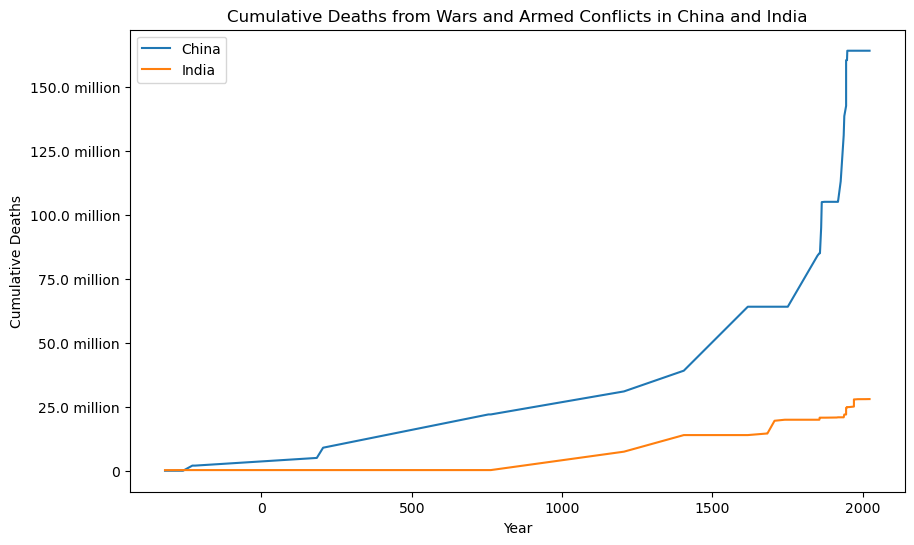

In [5]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(china_years_list, china_cumuls_list, label='China')
ax.plot(india_years_list, india_cumuls_list, label='India')

ax.set_xlabel('Year')

# Humanize y tick labels
plt.ylabel('Cumulative Deaths')
yticklabels_list = []
for text_obj in ax.get_yticklabels():
    text_obj.set_text(humanize.intword(int(text_obj.get_position()[1])))
    yticklabels_list.append(text_obj)
ax.set_yticklabels(yticklabels_list)

ax.set_title('Cumulative Deaths from Wars and Armed Conflicts in China and India')
ax.legend()

plt.show()


## For this visualization, use the start year and end year to cut the Geometric mean estimate

In [6]:

mask_series = (anthropogenic_disasters_df.percent_india > 0.0) | (anthropogenic_disasters_df.percent_china > 0.0)
china_cumuls_dict = {}
india_cumuls_dict = {}
for row_index, row_series in anthropogenic_disasters_df[mask_series].sort_values('Start').iterrows():
    # event_name = row_series.Event
    gme = row_series['Geometric mean estimate']
    start_year = row_series.Start
    stop_year = row_series.End
    
    percent_china = row_series.percent_china
    china_deaths = int(gme * percent_china / 100)
    if (start_year == stop_year):
        years = [start_year]
        values = [china_deaths]
    else:
        years = np.arange(start_year, stop_year + 1)
        values = china_deaths / (stop_year - start_year) * (years - years + 1)
    for year, value in zip(years, values): china_cumuls_dict[year] = china_cumuls_dict.get(year, 0) + int(value)
    
    percent_india = row_series.percent_india
    india_deaths = int(gme * percent_india / 100)
    if (start_year == stop_year):
        years = [start_year]
        values = [india_deaths]
    else:
        years = np.arange(start_year, stop_year + 1)
        values = india_deaths / (stop_year - start_year) * (years - years + 1)
    for year, value in zip(years, values): india_cumuls_dict[year] = india_cumuls_dict.get(year, 0) + int(value)

china_cumuls_list = sorted([(year, value) for year, value in china_cumuls_dict.items()], key=lambda china_tuple: china_tuple[0])
china_years_list = [china_tuple[0] for china_tuple in china_cumuls_list]
china_cumuls_list = pd.Series([china_tuple[1] for china_tuple in china_cumuls_list]).cumsum().tolist()

india_cumuls_list = sorted([(year, value) for year, value in india_cumuls_dict.items()], key=lambda india_tuple: india_tuple[0])
india_years_list = [india_tuple[0] for india_tuple in india_cumuls_list]
india_cumuls_list = pd.Series([india_tuple[1] for india_tuple in india_cumuls_list]).cumsum().tolist()

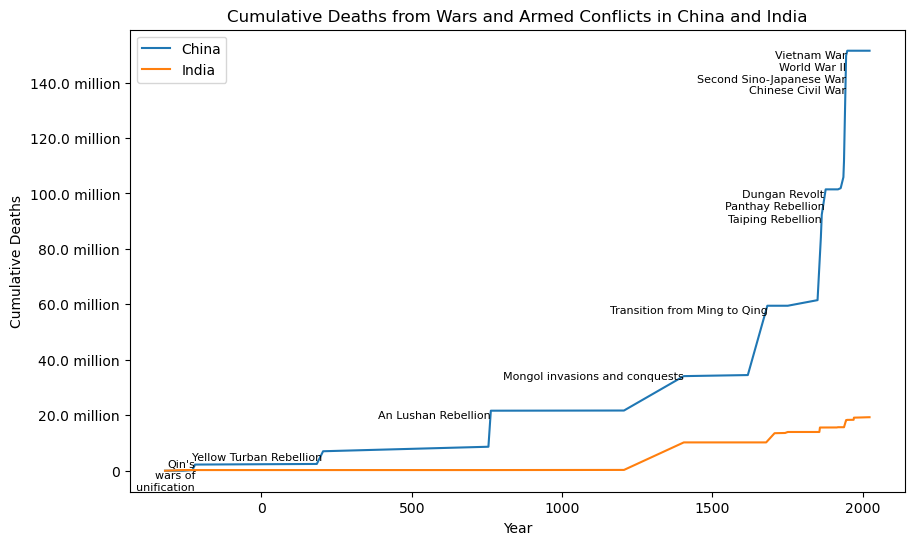

In [7]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(china_years_list, china_cumuls_list, label='China')
ax.plot(india_years_list, india_cumuls_list, label='India')

ax.set_xlabel('Year')

# Humanize y tick labels
plt.ylabel('Cumulative Deaths')
yticklabels_list = []
for text_obj in ax.get_yticklabels():
    text_obj.set_text(humanize.intword(int(text_obj.get_position()[1])))
    yticklabels_list.append(text_obj)
ax.set_yticklabels(yticklabels_list)

# Add the annotations for the peaks
annotations_list = [
    ("Qin's\nwars of\nunification", -221, 4222220),
    ('Yellow Turban Rebellion', 203, 6586560),
    ('An Lushan Rebellion', 763, 21647994),
    ('Mongol invasions and conquests', 1405, 35894774),
    ('Transition from Ming to Qing', 1683, 59500384),
    ('Taiping Rebellion', 1864, 92304403),
    ('Dungan Revolt\nPanthay Rebellion', 1873, 101472507),
    ('Vietnam War\nWorld War II\nSecond Sino-Japanese War\nChinese Civil War', 1945, 151469902),
]
for annotation_tuple in annotations_list:
    label = annotation_tuple[0]
    x = annotation_tuple[1]
    y = annotation_tuple[2]
    annotation = plt.annotate(label, xy=(x, y), xytext=(x, y+1000), xycoords='data', ha='right', va='top', fontsize=8);

ax.set_title('Cumulative Deaths from Wars and Armed Conflicts in China and India')
ax.legend()

plt.show()

In [8]:

df = pd.concat(
    [pd.Series(china_cumuls_list, index=china_years_list), pd.Series(china_cumuls_list, index=china_years_list).diff(), pd.Series(china_cumuls_list, index=china_years_list).diff().diff()], axis='columns'
).rename(columns={0: 'china_cumuls_list', 1: 'china_cumuls_diff', 2: 'china_cumuls_diff_diff'})
mask_series = ~df.china_cumuls_diff_diff.isnull() & (df.china_cumuls_diff_diff != 0.0)
mask_series = anthropogenic_disasters_df.Start.isin(df[mask_series].index) & (anthropogenic_disasters_df.percent_china > 0.0)
columns_list = ['Event', 'End']
df = anthropogenic_disasters_df[mask_series].sort_values('Start')[columns_list].rename(columns={'Event': 'label', 'End': 'x'})
df['y'] = df.x.map(lambda x: china_cumuls_list[china_years_list.index(x)])
display(df)

,label,x,y
19,Qin's wars of unification,-221,2222220
14,Yellow Turban Rebellion,205,7022994
7,An Lushan Rebellion,763,21647994
1,Mongol invasions and conquests,1405,34115794
4,Transition from Ming to Qing,1683,59500384
2,Taiping Rebellion,1864,92304403
31,Panthay Rebellion,1873,98803843
8,Dungan Revolt,1877,101470507
9,Chinese Civil War,1949,151468726
5,Second Sino-Japanese War,1945,149710290
